In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3

data_dir = "../data/"

In [135]:
# Read in the data
food_production = pd.read_csv(data_dir+'food production.csv')

In [136]:
# Print the first two rows of the DataFrame
print(food_production.head(2))

  Country Code  Year  Cereal production (metric tons)  \
0          USA  1961                      163619978.0   
1          USA  1962                      162455780.0   

   Food production index (2014-2016 = 100)  
0                                    41.25  
1                                    41.31  


In [137]:
# create a new sqlite database
conn = sqlite3.connect('../food_inflation_analysis.db')

In [138]:
# query the database to get the train data
query = '''SELECT * FROM OCED_USA_FOOD_INFLATION'''
cpi_food_data = pd.read_sql(query, conn)
cpi_food_data.index = pd.to_datetime(cpi_food_data['Date'])
cpi_food_data.drop('Date', axis=1, inplace=True)
# print head
print(cpi_food_data.head(5))


                 CPI  CPI_lag_1  CPI_lag_2  CPI_lag_3  CPI_lag_4  CPI_lag_5  \
Date                                                                          
1956-01-01 -1.700680        NaN        NaN        NaN        NaN        NaN   
1956-02-01 -2.372881  -1.700680        NaN        NaN        NaN        NaN   
1956-03-01 -2.033898  -2.372881  -1.700680        NaN        NaN        NaN   
1956-04-01 -1.689189  -2.033898  -2.372881  -1.700680        NaN        NaN   
1956-05-01 -0.337838  -1.689189  -2.033898  -2.372881   -1.70068        NaN   

            CPI_lag_6  
Date                   
1956-01-01        NaN  
1956-02-01        NaN  
1956-03-01        NaN  
1956-04-01        NaN  
1956-05-01        NaN  


0    1970-01-01 00:00:00.000001961
1    1970-01-01 00:00:00.000001962
2    1970-01-01 00:00:00.000001963
3    1970-01-01 00:00:00.000001964
4    1970-01-01 00:00:00.000001965
                  ...             
56   1970-01-01 00:00:00.000002017
57   1970-01-01 00:00:00.000002018
58   1970-01-01 00:00:00.000002019
59   1970-01-01 00:00:00.000002020
60   1970-01-01 00:00:00.000002021
Name: Year, Length: 61, dtype: datetime64[ns]


Text(0.5, 0, 'Year')

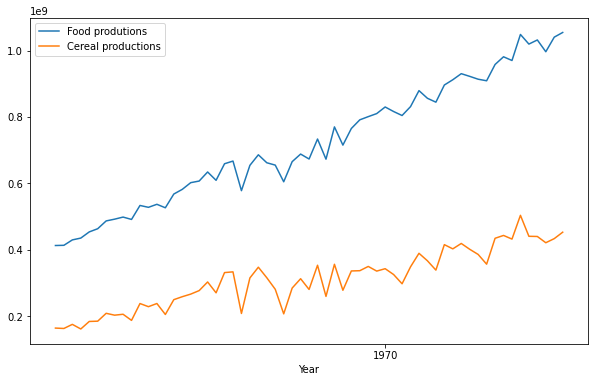

In [139]:
# Food production processing
# print the data types of the columns
time = food_production["Year"]
# convert the time column to datetime
time = pd.to_datetime(time)
print(time)

Cereal_production=food_production["Cereal production (metric tons)"]

Food_p=food_production["Food production index (2014-2016 = 100)"]*10e6
plt.figure(figsize=(10, 6))
# plot the time series
plt.plot(time,Food_p,label="Food produtions")
plt.plot(time,Cereal_production,label="Cereal productions")
plt.legend()

plt.xlabel("Year")


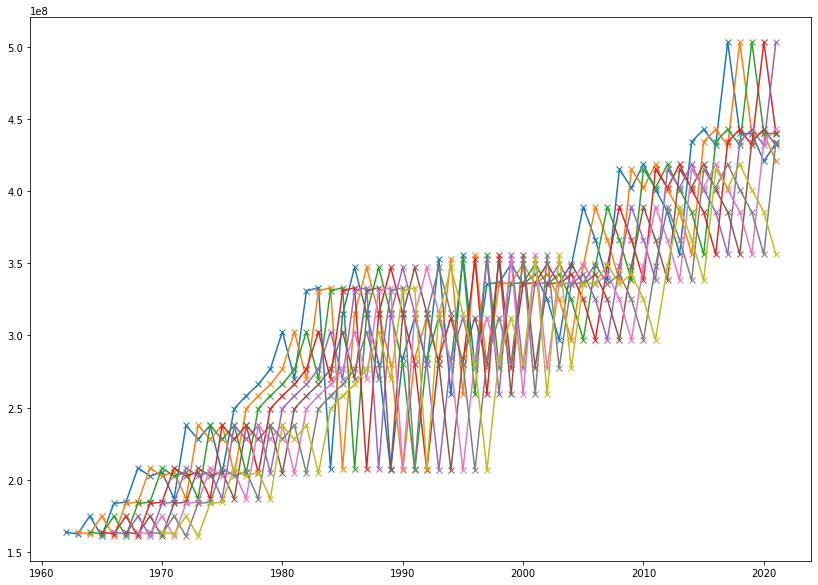

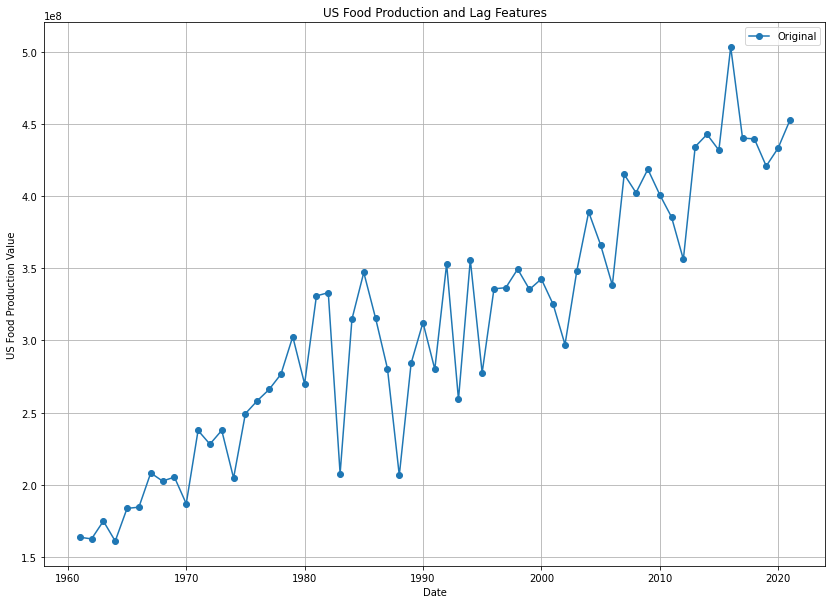

In [140]:
plt.figure(figsize=(14, 10))
# plot the time series lagged by 1 to 10
for lag in range(1, 10):  # You can change the range for the number of lags you want
    food_production[f'food_prod_lag_{lag}'] = food_production['Cereal production (metric tons)'].shift(lag)
    plt.plot(food_production["Year"], food_production[f'food_prod_lag_{lag}'], label=f'Lag {lag}', marker='x')
plt.figure(figsize=(14, 10))
plt.plot(food_production["Year"], food_production['Cereal production (metric tons)'], label='Original', marker='o')

plt.title('US Food Production and Lag Features')
plt.xlabel('Date')
plt.ylabel('US Food Production Value')
plt.legend()
plt.grid(True)
plt.show()

In [141]:
food_production.columns

Index(['Country Code', 'Year', 'Cereal production (metric tons)',
       'Food production index (2014-2016 = 100)', 'food_prod_lag_1',
       'food_prod_lag_2', 'food_prod_lag_3', 'food_prod_lag_4',
       'food_prod_lag_5', 'food_prod_lag_6', 'food_prod_lag_7',
       'food_prod_lag_8', 'food_prod_lag_9'],
      dtype='object')

In [142]:
# compute the correlation matrix
lag_features = [col for col in food_production.columns if col.startswith('food_prod_lag_')]
selected_columns = ['Cereal production (metric tons)'] + lag_features
test_df = food_production[selected_columns]

correlation_matrix=test_df.corr()
print(correlation_matrix['Cereal production (metric tons)'])

Cereal production (metric tons)    1.000000
food_prod_lag_1                    0.865648
food_prod_lag_2                    0.857672
food_prod_lag_3                    0.841542
food_prod_lag_4                    0.840451
food_prod_lag_5                    0.852577
food_prod_lag_6                    0.825000
food_prod_lag_7                    0.812509
food_prod_lag_8                    0.799788
food_prod_lag_9                    0.784027
Name: Cereal production (metric tons), dtype: float64


In [143]:
food_production.shape

(61, 13)

In [144]:
# Rename the columns of food_production dataframe
food_production.rename(columns={'Food production index (2014-2016 = 100)': 'Food_Production', 'Cereal production (metric tons)': 'Cereal_Production'}, inplace=True)
food_production.drop(['Country Code'], axis=1, inplace=True)
print(food_production.columns)


Index(['Year', 'Cereal_Production', 'Food_Production', 'food_prod_lag_1',
       'food_prod_lag_2', 'food_prod_lag_3', 'food_prod_lag_4',
       'food_prod_lag_5', 'food_prod_lag_6', 'food_prod_lag_7',
       'food_prod_lag_8', 'food_prod_lag_9'],
      dtype='object')


In [145]:
# save train data to the sqlite database as a new table named OCED_USA_FOOD_INFLATION
food_production.to_sql('food_production', conn, if_exists='replace', index=False)
conn.close()

In [146]:
cpi_food_data

,CPI,CPI_lag_1,CPI_lag_2,CPI_lag_3,CPI_lag_4,CPI_lag_5,CPI_lag_6
Date,,,,,,,
1956-01-01,-1.700680,NaN,NaN,NaN,NaN,NaN,NaN
1956-02-01,-2.372881,-1.700680,NaN,NaN,NaN,NaN,NaN
1956-03-01,-2.033898,-2.372881,-1.700680,NaN,NaN,NaN,NaN
1956-04-01,-1.689189,-2.033898,-2.372881,-1.700680,NaN,NaN,NaN
1956-05-01,-0.337838,-1.689189,-2.033898,-2.372881,-1.700680,NaN,NaN
...,...,...,...,...,...,...,...
2023-05-01,5.647190,7.009775,8.325572,10.149780,11.357280,11.882750,11.956870
2023-06-01,4.581234,5.647190,7.009775,8.325572,10.149780,11.357280,11.882750
2023-07-01,3.485868,4.581234,5.647190,7.009775,8.325572,10.149780,11.357280


In [147]:
# get the correlation between the cpi and the imports/exports
# align indexes of the dataframes
cpi_timeseries = cpi_food_data['CPI']
cpi_food_data_yearly = cpi_timeseries.resample('Y').mean()
cpi_food_data_yearly.index = cpi_food_data_yearly.index.year
# align indexes of the dataframes
# align index name
cpi_food_data_yearly.index.name = 'Year'

# print head
print(cpi_food_data_yearly.head(5))
print(food_production.head(5))

# inner join the dataframes
food_production_combined = food_production.join(cpi_food_data_yearly, how='inner', on='Year')

# print head
print(food_production_combined.head(5))


Year
1956    0.595752
1957    3.238256
1958    4.372906
1959   -2.383241
1960    0.913196
Name: CPI, dtype: float64
   Year  Cereal_Production  Food_Production  food_prod_lag_1  food_prod_lag_2  \
0  1961        163619978.0            41.25              NaN              NaN   
1  1962        162455780.0            41.31      163619978.0              NaN   
2  1963        174812487.0            42.94      162455780.0      163619978.0   
3  1964        160937079.0            43.49      174812487.0      162455780.0   
4  1965        183602617.0            45.35      160937079.0      174812487.0   

   food_prod_lag_3  food_prod_lag_4  food_prod_lag_5  food_prod_lag_6  \
0              NaN              NaN              NaN              NaN   
1              NaN              NaN              NaN              NaN   
2              NaN              NaN              NaN              NaN   
3      163619978.0              NaN              NaN              NaN   
4      162455780.0      16361997

In [148]:
# Find correlation between cpi and food production of current year
production_corr = food_production_combined['Cereal_Production'].corr(food_production_combined['CPI'])


# Find correlation between cpi and food production of previous year
production_corr_lag = food_production_combined['food_prod_lag_1'].corr(food_production_combined['CPI'])

print("Correlation between CPI and Production: ", production_corr)

print("Correlation between CPI and Production of previous year: ", production_corr_lag)

corrs=[]
lag=[2,3,4,5,6,7,8,9]
for i in range(2, 10):
    export_corr_lag = food_production_combined[f'food_prod_lag_{i}'].corr(food_production_combined['CPI'])
    print(f"Correlation between CPI and Production of {i} years ago: ", export_corr_lag)
    corrs.append(export_corr_lag)
# get confidence intervals for the correlation

# # exports
# # get the standard error
# export_se = 1 / np.sqrt(len(food_production_combined['Food_Production_lag']))
# # get the z-score
# export_z = np.arctanh(export_corr_lag)
# # get the confidence interval
# export_ci = export_z + np.array([-1, 1]) * export_se * 1.96
# # convert back to correlation
# export_ci = np.tanh(export_ci)
# print("Confidence interval for correlation between CPI and Exports: ", export_ci)

Correlation between CPI and Production:  -0.2713895143873192
Correlation between CPI and Production of previous year:  -0.3249125784026461
Correlation between CPI and Production of 2 years ago:  -0.34498817670778165
Correlation between CPI and Production of 3 years ago:  -0.3644563297849289
Correlation between CPI and Production of 4 years ago:  -0.3860722051185775
Correlation between CPI and Production of 5 years ago:  -0.437059993015165
Correlation between CPI and Production of 6 years ago:  -0.46735549148238636
Correlation between CPI and Production of 7 years ago:  -0.5026124483352377
Correlation between CPI and Production of 8 years ago:  -0.5309403955693679
Correlation between CPI and Production of 9 years ago:  -0.5658312500873992


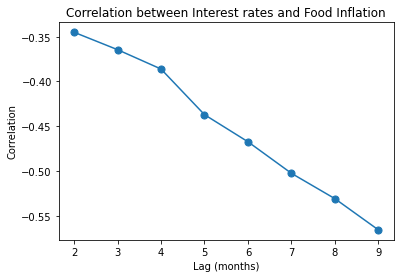

In [149]:
# plot the correlation vs lag
plt.plot(lag, corrs)
plt.scatter(lag, corrs, s=50)
plt.title('Correlation between Food production and Food Inflation')
plt.xlabel('Lag (months)')
plt.ylabel('Correlation')
plt.show()